In [1]:
import numpy as np
import scipy.stats as st
import statistics as stats
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns


%matplotlib inline

For the illustration of our problem we'll start from the Q01 site as example

In [2]:
df_Q1=pd.read_csv("Lyell_blw_Maclure_timeseries_stage_Q_T_2005_2015.csv",low_memory=False)
df_Q01=df_Q1[df_Q1[' estimated_discharge(cms)'].isna()==False]
df_Q01['date_time(inGMT_PDTplus7)']=pd.to_datetime(df_Q01['date_time(inGMT_PDTplus7)'])

E:\tools\py\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


E:\tools\py\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Q01 site water temperature time series plot')

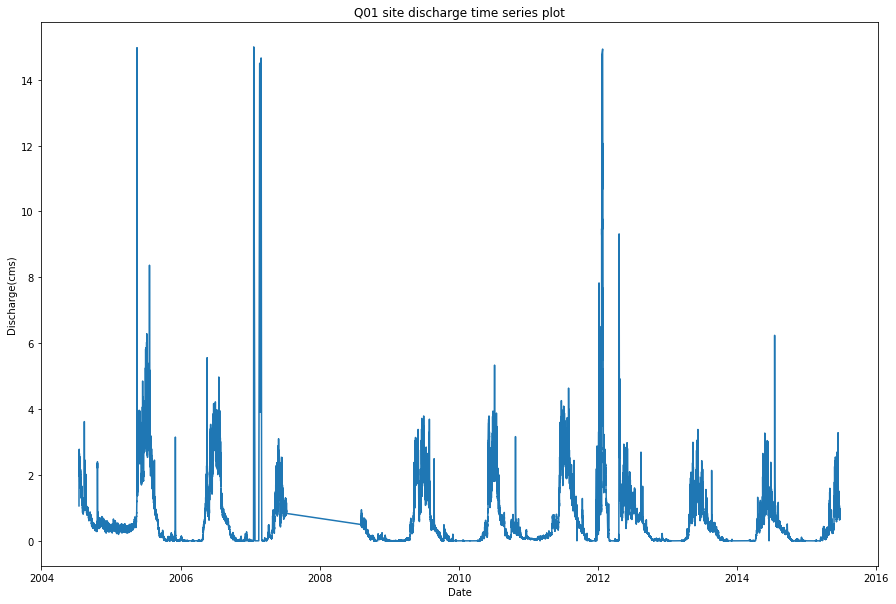

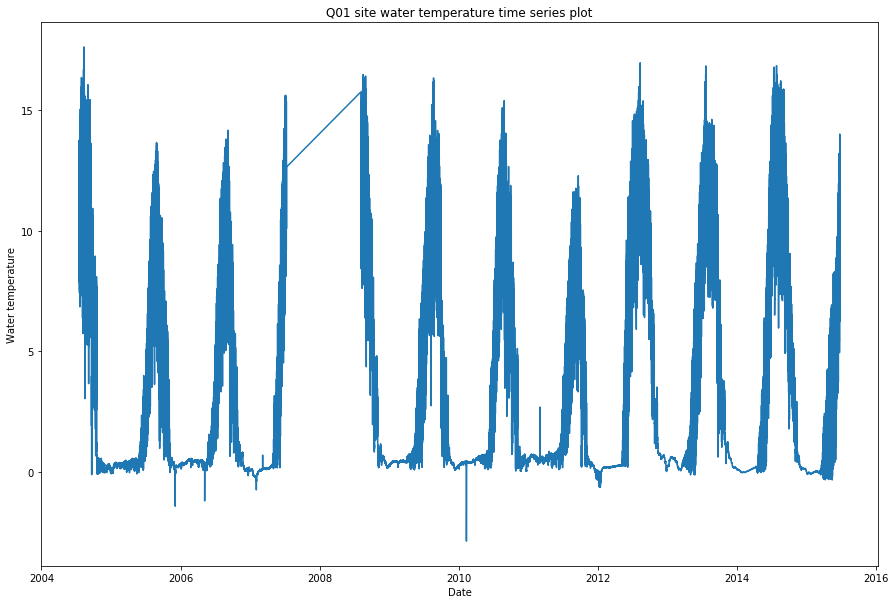

In [3]:
plt.figure(figsize=(15,10))
plt.plot(df_Q01['date_time(inGMT_PDTplus7)'],df_Q01[' estimated_discharge(cms)'])
plt.xlabel('Date')
plt.ylabel('Discharge(cms)')
plt.title('Q01 site discharge time series plot')

plt.figure(figsize=(15,10))
plt.plot(df_Q01['date_time(inGMT_PDTplus7)'],df_Q01[' water_temperature(deg_C)'])
plt.xlabel('Date')
plt.ylabel('Water temperature')
plt.title('Q01 site water temperature time series plot')

Note

1. do data cleaning first
2. recheck the process: i.e. if air temp is available, consider to set question as : is air temp controls discharge, is air temp controls water temp, or air&water temp controls discharge
3. parse the data to avoid autocorrelation, do the average of discharge based on weeks/month for the analysis, also try to get the min/max/avg temp from the parse period for the analysis

In [4]:
df_Q01.columns

Index(['date_time(inGMT_PDTplus7)', ' raw_pressure(cm)',
       ' barocorrected_pressure(cm)',
       ' stage_in_feet(used_in_rating_curve_ft_referenced_to_bolt)',
       ' estimated_discharge(cms)',
       'lower_confidence_discharge_cms_bestestimate',
       'upper_confidence_discharge_cms_bestestimate',
       ' water_temperature(deg_C)', ' instrument_ID',
       ' offset_cm(cm_to_correct_solinst_to_bolt)',
       ' offset_ft(ft_to_correct_solinst_to_bolt)'],
      dtype='object')

In [5]:
df_c=df_Q01[df_Q01['date_time(inGMT_PDTplus7)']>='2009-01-01 00:00:00']
#Clean the abnormal points from original data
df_c=df_c[df_c[' estimated_discharge(cms)']<=8]

Text(0.5, 1.0, 'Q01 site water temperature time series plot-cleaned')

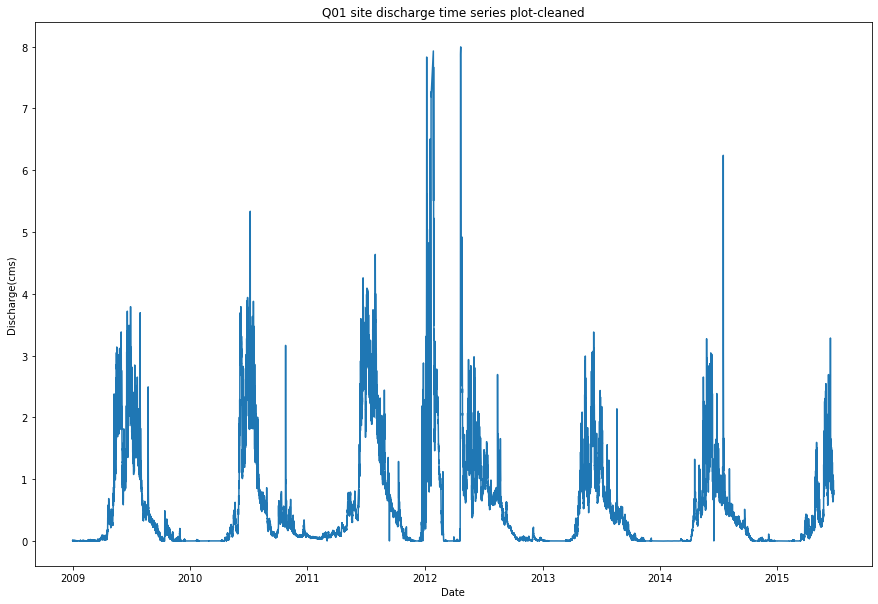

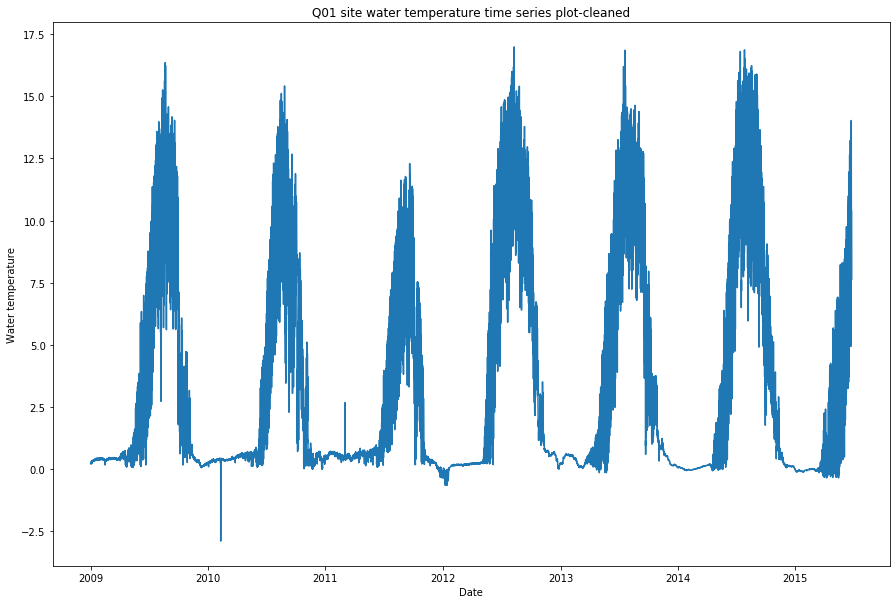

In [6]:
#Note that we only use the data from 2009 to 2015

plt.figure(figsize=(15,10))
plt.plot(df_c['date_time(inGMT_PDTplus7)'],df_c[' estimated_discharge(cms)'])
plt.xlabel('Date')
plt.ylabel('Discharge(cms)')
plt.title('Q01 site discharge time series plot-cleaned')

plt.figure(figsize=(15,10))
plt.plot(df_c['date_time(inGMT_PDTplus7)'],df_c[' water_temperature(deg_C)'])
plt.xlabel('Date')
plt.ylabel('Water temperature')
plt.title('Q01 site water temperature time series plot-cleaned')

In [7]:
df_c=df_c.set_index('date_time(inGMT_PDTplus7)')

In [8]:
df_c.head()

,raw_pressure(cm),barocorrected_pressure(cm),stage_in_feet(used_in_rating_curve_ft_referenced_to_bolt),estimated_discharge(cms),lower_confidence_discharge_cms_bestestimate,upper_confidence_discharge_cms_bestestimate,water_temperature(deg_C),instrument_ID,offset_cm(cm_to_correct_solinst_to_bolt),offset_ft(ft_to_correct_solinst_to_bolt)
date_time(inGMT_PDTplus7),,,,,,,,,,
2009-01-01 00:00:00,96.2,30,6.39,0.007014,-0.086348,0.093936,0.23,4,164.8,5.4
2009-01-01 00:30:00,96.7,30.3,6.4,0.009704,-0.086006,0.094692,0.23,4,164.8,5.4
2009-01-01 01:00:00,96.3,29.8,6.38,0.005388,-0.086576,0.093432,0.25,4,164.8,5.4
2009-01-01 01:30:00,96.1,29.3,6.37,0.002011,-0.087146,0.092172,0.25,4,164.8,5.4
2009-01-01 02:00:00,96.6,29.7,6.38,0.004629,-0.086690,0.093180,0.23,4,164.8,5.4


In [9]:
#Average for all years in different months
df_c[ ' estimated_discharge(cms)'].groupby(lambda x : x.month).mean()

1     0.308070
2     0.198115
3     0.024638
4     0.315827
5     0.931441
6     1.623214
7     1.577680
8     0.736647
9     0.294823
10    0.157225
11    0.049205
12    0.078547
Name:  estimated_discharge(cms), dtype: float64

In [10]:
df_c[' barocorrected_pressure(cm)']=df_c[' barocorrected_pressure(cm)'].astype(float)

In [11]:
#downsampling
discharge=df_c[ ' estimated_discharge(cms)'].resample('W').mean()
#pressure=df_c[ ' barocorrected_pressure(cm)'].resample('M',kind='period').mean()
offset=df_c[' offset_cm(cm_to_correct_solinst_to_bolt)'].resample('W').mean()
pressure=df_c[' barocorrected_pressure(cm)'].resample('W').mean()
tmean=df_c[' water_temperature(deg_C)'].resample('W').mean()
tmin=df_c[' water_temperature(deg_C)'].resample('W').min()
tmax=df_c[' water_temperature(deg_C)'].resample('W').max()

In [12]:
df_month=pd.DataFrame(discharge)
df_month['offset']=offset
df_month['pressure']=pressure
df_month['tmean']=tmean
df_month['tmin']=tmin
df_month['tmax']=tmax
df_month.columns=['discharge','offset','pressure','tmean','tmin','tmax']

In [13]:
#Resampled dataframe
df_month.head()

,discharge,offset,pressure,tmean,tmin,tmax
date_time(inGMT_PDTplus7),,,,,,
2009-01-04,0.001777,164.8,28.613021,0.259740,0.22,0.31
2009-01-11,0.000694,164.8,28.300893,0.333839,0.28,0.38
2009-01-18,0.000077,164.8,27.811607,0.381458,0.35,0.43
2009-01-25,0.000809,164.8,27.896429,0.406696,0.37,0.43
2009-02-01,0.000770,164.8,28.546429,0.411607,0.38,0.44


In [14]:
df_month[df_month['discharge']>=0.4].shape

(128, 6)

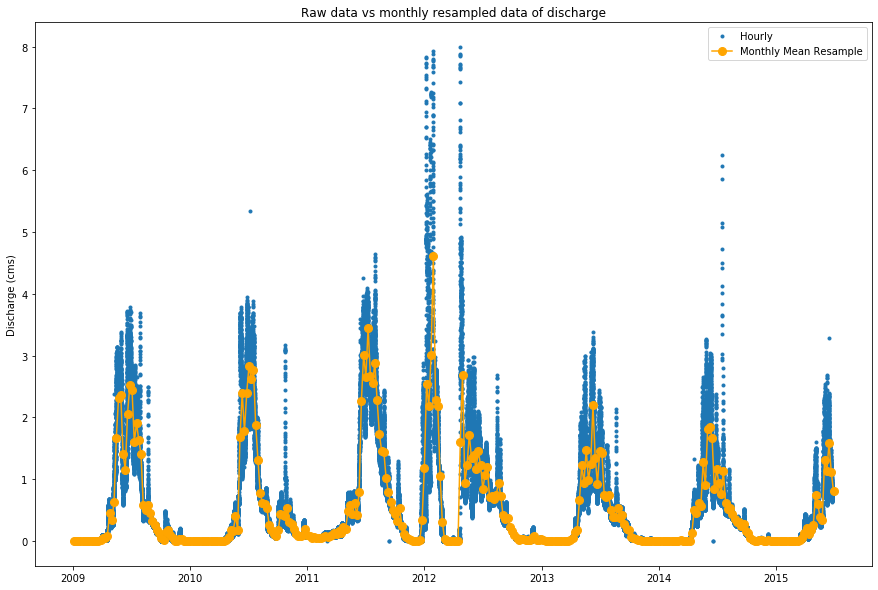

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(df_c.loc[:,  ' estimated_discharge(cms)'],
marker='.', linestyle='None', linewidth=0.5, label='Hourly')
ax.plot(df_month.loc[:, 'discharge'],
marker='o', markersize=8, linestyle='-',color='orange', label='Monthly Mean Resample')
ax.set_ylabel('Discharge (cms)')
plt.title('Raw data vs monthly resampled data of discharge')
ax.legend();

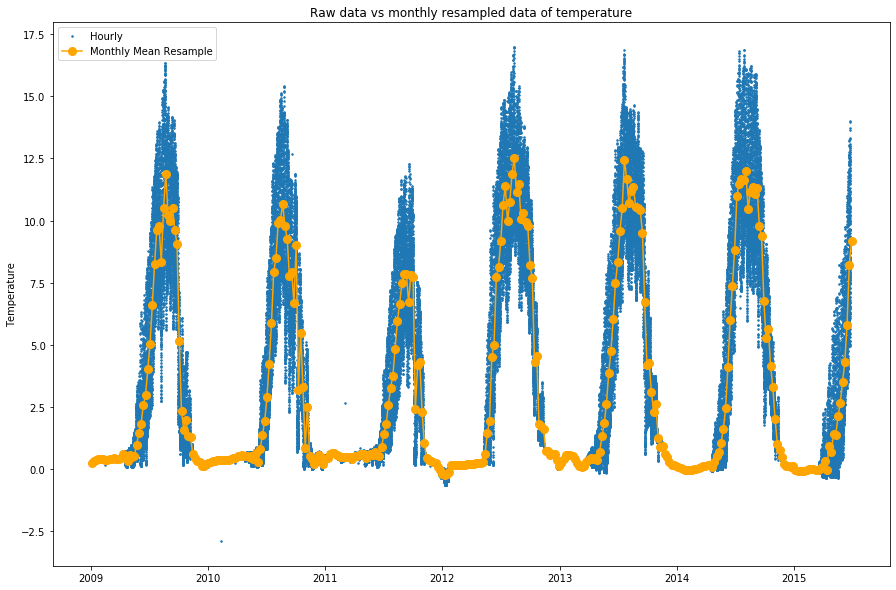

In [16]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(df_c.loc[:,  ' water_temperature(deg_C)'],
marker='.',markersize=3, linestyle='None', linewidth=0.5, label='Hourly')
ax.plot(df_month.loc[:, 'tmean'],
marker='o', markersize=8, linestyle='-',color='orange', label='Monthly Mean Resample')
ax.set_ylabel('Temperature')
plt.title('Raw data vs monthly resampled data of temperature')
ax.legend();

In [17]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
#sns.set(rc={'figure.figsize':(11, 4)})

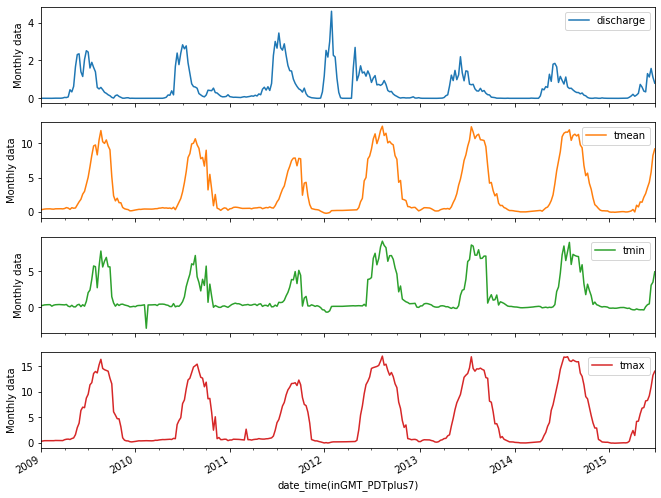

In [18]:
cols_plot = ['discharge', 'tmean', 'tmin','tmax']
axes = df_month[cols_plot].plot( linestyle='-', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Monthly data')

## As the graph above shows there is a change happened around 2012 period. The discharge looks be smaller after 2012. By checking in detail we propose the change take place around 2012-7-29

Text(0, 0.5, 'frequency')

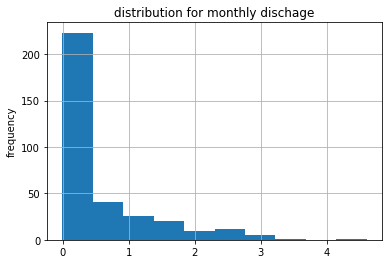

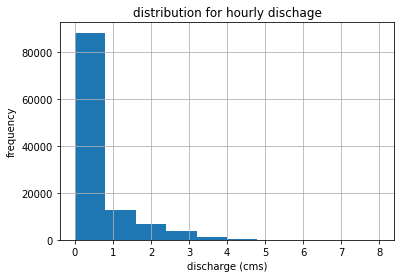

In [19]:
plt.figure(1)
df_month['discharge'].hist()
plt.title('distribution for monthly dischage')
plt.ylabel('frequency')

plt.figure(2)
df_c[' estimated_discharge(cms)'].hist()
plt.title('distribution for hourly dischage')
plt.xlabel('discharge (cms)')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

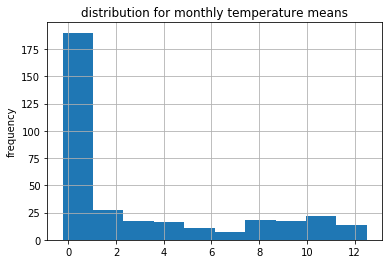

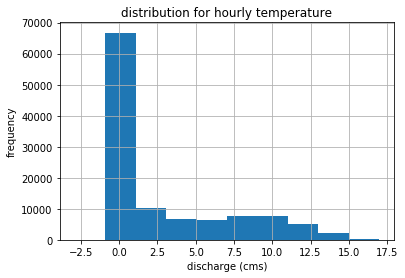

In [20]:
plt.figure(1)
df_month['tmean'].hist()
plt.title('distribution for monthly temperature means')
plt.ylabel('frequency')

plt.figure(2)
df_c[' water_temperature(deg_C)'].hist()
plt.title('distribution for hourly temperature')
plt.xlabel('discharge (cms)')
plt.ylabel('frequency')

## Q1. In different period with different temperatures, is there any significant changes for the discharge means?

We can clearly see that the tmin before 2012 is much lower than after 2012, and also there is a change on the dischage happened around 2012, so we can propose that there is a change for the discharge means happened due to tmin change. Then we can validate it below.

In [21]:
df_pre=df_month[df_month.index<='2012-07-29 00:00:00']
df_aft=df_month[df_month.index>'2012-07-29 00:00:00']

In [22]:
print('before 2012 tmin mean=',df_pre['tmin'].mean())
print('before 2012 discharge mean=',df_pre['discharge'].mean())
print('after 2012 tmin mean=',df_aft['tmin'].mean())
print('after 2012 discharge mean=',df_aft['discharge'].mean())

before 2012 tmin mean= 1.258395721925133
before 2012 discharge mean= 0.6950501481104051
after 2012 tmin mean= 2.0209210526315804
after 2012 discharge mean= 0.3451053944228666


Then we validate if there is any significant change on the discharge by hypothesis testing, discharge after 2012 is smaller than before 2012

First, we need to create a null and an alternative hypothesis. We were told to use a two sample test, and to
set α at 5%.

H0 : $$μ_p = μ_l$$

H1 : $$μ_p < μ_l$$

Text(0, 0.5, 'Number of Occurences')

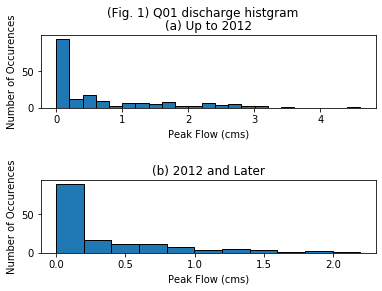

In [23]:
#Make a histogram for each period

bin_width = 0.2 # bin width in cfs

# Create a figure with subplots
fig1, axs = plt.subplots(2, 1)
fig1.subplots_adjust(hspace=1)
fig1.suptitle('(Fig. 1) Q01 discharge histgram')

# set bin number so that intervals are equal in these two plots
nbins = int(( np.max(df_pre['discharge']) - np.min(df_pre['discharge']) ) / bin_width )
axs[0].hist(df_pre['discharge'], nbins, ec="black")
axs[0].set_title('(a) Up to 2012')
axs[0].set_xlabel('Peak Flow (cms)')
axs[0].set_ylabel('Number of Occurences')


# set bin number so that intervals are equal in these two plots
nbins = int(( np.max(df_aft['discharge']) - np.min(df_aft['discharge']) ) / bin_width )
axs[1].hist(df_aft['discharge'], nbins, ec="black")
axs[1].set_title('(b) 2012 and Later')
axs[1].set_xlabel('Peak Flow (cms)')
axs[1].set_ylabel('Number of Occurences')


In [24]:
n = len(df_pre['discharge'])
m = len(df_aft['discharge'])
print(n)
print(m)

187
152


In [25]:
conf = 0.95
delta_0 = 0
z_alpha = st.norm.ppf(conf)
print("z_alpha =")
print(z_alpha)
mean2 = stats.mean(df_pre['discharge'])
mean1 = stats.mean(df_aft['discharge'])
sd2 = stats.stdev(df_pre['discharge'])
sd1 = stats.stdev(df_aft['discharge'])
pooled_sd = math.sqrt(sd1**2/m + sd2**2/n)
ztest = (mean2 - mean1 - delta_0)/pooled_sd
print("z_test =")
print(ztest)
p = 1 - st.norm.cdf(ztest)
print("p = ")
print(p)

z_alpha =
1.6448536269514722
z_test =
4.476411763083108
p = 
3.7954009569629577e-06


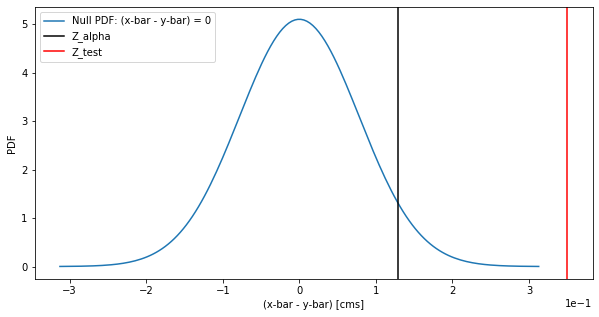

In [26]:
plt.figure(figsize=(10,5))
x = np.linspace(-4, 4, num=160)
x = [i * pooled_sd for i in x]
plt.plot(x, st.norm.pdf(x, 0, pooled_sd), label='Null PDF: (x-bar - y-bar) = 0')
plt.axvline(z_alpha*pooled_sd, color='black', label='Z_alpha')
plt.axvline(ztest*pooled_sd, color='red', label='Z_test')
plt.xlabel('(x-bar - y-bar) [cms]')
plt.ylabel('PDF')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.legend(loc='best')

## As the results shows, since P=3e-6<0.05, we can rejected the null hypothesis within the 95% confidence.

Which means the discharge means changed significantly between prior 2012 and after 2012 periods.

In [27]:
conf = 0.95
delta_0 = 0
z_alpha = st.norm.ppf(conf)
print("z_alpha =")
print(z_alpha)
mean1 = stats.mean(df_pre['tmean'])
mean2 = stats.mean(df_aft['tmean'])
sd1 = stats.stdev(df_pre['tmean'])
sd2 = stats.stdev(df_aft['tmean'])
pooled_sd = math.sqrt(sd1**2/m + sd2**2/n)
ztest = (mean2 - mean1 - delta_0)/pooled_sd
print("z_test =")
print(ztest)
p = 1 - st.norm.cdf(ztest)
print("p = ")
print(p)

z_alpha =
1.6448536269514722
z_test =
2.3253326765138924
p = 
0.010027089159881153


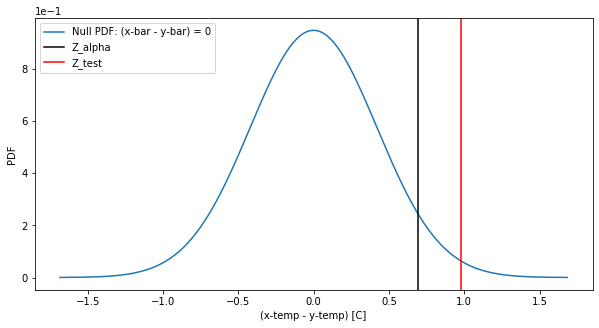

In [28]:
plt.figure(figsize=(10,5))
x = np.linspace(-4, 4, num=160)
x = [i * pooled_sd for i in x]
plt.plot(x, st.norm.pdf(x, 0, pooled_sd), label='Null PDF: (x-bar - y-bar) = 0')
plt.axvline(z_alpha*pooled_sd, color='black', label='Z_alpha')
plt.axvline(ztest*pooled_sd, color='red', label='Z_test')
plt.xlabel('(x-temp - y-temp) [C]')
plt.ylabel('PDF')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.legend(loc='best')

## As the results shows, since P=0.002<0.05, we can rejected the null hypothesis within the 95% confidence.

Which means the Tmean changed significantly between prior 2012 and after 2012 periods.Tmin after 2012 is significantly higher than before 2012.

## Q2. is there any relationship between water temperatures and air temperature during certain periods?

Here we try to fit a model for discharge use all the variables provided.

In [29]:
from scipy.linalg import lstsq

In [30]:
df_month.columns

Index(['discharge', 'offset', 'pressure', 'tmean', 'tmin', 'tmax'], dtype='object')

In [31]:
Xmulti = np.array([df_month['tmin'],
                   df_month['tmax'],
                    df_month['tmean'],
                   ]).T
print(Xmulti.shape)
print(df_month['discharge'].shape)

(339, 3)
(339,)


In [32]:
B, res, rnk, s = lstsq(Xmulti, df_month['discharge'])
print('The trend for each variable(first one is B0)=', B)

The trend for each variable(first one is B0)= [-0.02032358  0.29338467 -0.33512954]


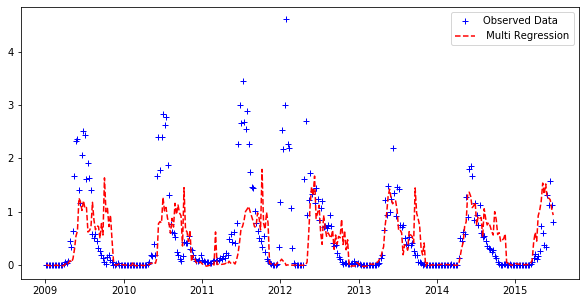

In [33]:
plt.figure(figsize=(10,5))
plt.plot(df_month['discharge'],'b+', label='Observed Data')
plt.plot(df_month.index,Xmulti.dot(B),'r--', label=' Multi Regression')

#n = df_month['discharge'].size
#Bv2 = np.polyfit(df_month['discharge'],df_month['discharge'],1)
#print('The trend for precipitation= ', Bv2)
#x = np.linspace(np.min(df_cas['year']), np.max(df_cas['year']),n)
#y = Bv2[1] + Bv2[0]*x
#plt.plot(x,y,'k--',label='Linear Regression');

plt.legend()

The model performance enhanced significantly after taking pressure into account. Note that offset and pressure may plays more important role to the discharge change.Also according the trends, offset and pressure determines the most trend for the model (if not considering the constant viriable).

## Q3. Using the Anova test to see if there is any change happens in different periods

In [34]:
#df_c=df_c.set_index(' date_time(inGMT_PDTplus7)')
discharge=df_c[ ' estimated_discharge(cms)'].resample('W').mean()
tmean=df_c[' water_temperature(deg_C)'].resample('W').mean()
df_week=pd.DataFrame(discharge)
df_week['tmean']=tmean
df_week.columns=['discharge', 'tmean']
df_week[df_week['discharge']<0]=0
df_week.head()

,discharge,tmean
date_time(inGMT_PDTplus7),,
2009-01-04,0.001777,0.259740
2009-01-11,0.000694,0.333839
2009-01-18,0.000077,0.381458
2009-01-25,0.000809,0.406696
2009-02-01,0.000770,0.411607


In [35]:
df_week['datetime']=df_week.index
cols = df_week.columns.tolist()
cols1 = cols[-1:] + cols[:-1]
df_week1=df_week[cols1]
df_week1=df_week1.reset_index(drop = True)
df_week1.head()

,datetime,discharge,tmean
0,2009-01-04,0.001777,0.259740
1,2009-01-11,0.000694,0.333839
2,2009-01-18,0.000077,0.381458
3,2009-01-25,0.000809,0.406696
4,2009-02-01,0.000770,0.411607


Note that we interpreted cumulative discharge to determine the periods of discharge rising. We use 20% of total cumulative discharge as the starting point. By this approach we assume that the periods we selected is according to the air temperatrue rising periods thus we can got a general idea of when was the snow began to melt which eventually led to discharge increase.

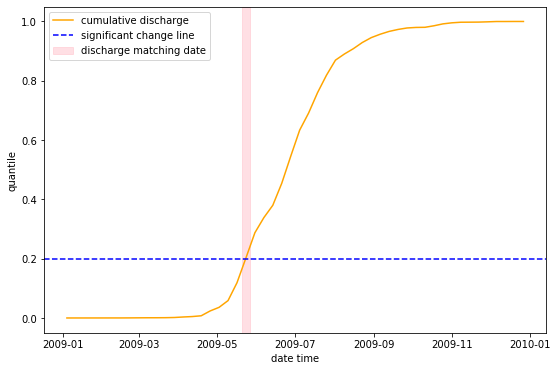

In [36]:
df_2009=df_week1[0:52]
from scipy.interpolate import interp1d

dsum2009=np.sum(df_2009['discharge'])
dcsum2009=np.cumsum(df_2009['discharge'])
dcp2009=dcsum2009/dsum2009

tsum2009=np.sum(df_2009['tmean'])
tcsum2009=np.cumsum(df_2009['tmean'])
tcp2009=tcsum2009/tsum2009


plt.figure(figsize=(9,6))
plt.plot(df_2009['datetime'], dcp2009, label='cumulative discharge', color='orange')
#plt.plot(df_2009['datetime'], tcp2009, label='cumulative tmean', color='cyan')
plt.axhline(0.2, color='blue', linestyle='--', label='significant change line')
plt.axvspan('2009-05-21','2009-05-27', alpha=0.5, color='pink', label='discharge matching date')
#plt.axvspan('2009-07-05','2009-07-12', alpha=0.2, color='blue', label='temperature matching date')
plt.xlabel('date time')
plt.ylabel('quantile')
plt.legend(loc="best")

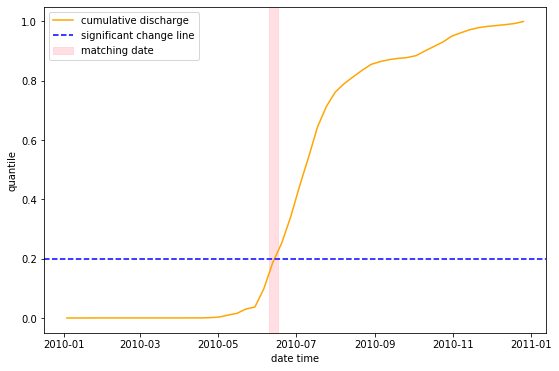

In [37]:
df_2010=df_week1[52:104]
dsum2010=np.sum(df_2010['discharge'])
dcsum2010=np.cumsum(df_2010['discharge'])
dcp2010=dcsum2010/dsum2010

tsum2010=np.sum(df_2010['tmean'])
tcsum2010=np.cumsum(df_2010['tmean'])
tcp2010=tcsum2010/tsum2010

plt.figure(figsize=(9,6))
plt.plot(df_2010['datetime'], dcp2010, label='cumulative discharge', color='orange')
#plt.plot(df_2010['datetime'], tcp2010, label='cumulative tmean', color='cyan')
plt.axhline(0.2, color='blue', linestyle='--', label='significant change line')
plt.axvspan('2010-06-10','2010-06-17', alpha=0.5, color='pink', label='matching date')
#plt.axvspan('2010-07-18','2010-07-25', alpha=0.2, color='blue', label='temperature matching date')
plt.xlabel('date time')
plt.ylabel('quantile')
plt.legend(loc="best")

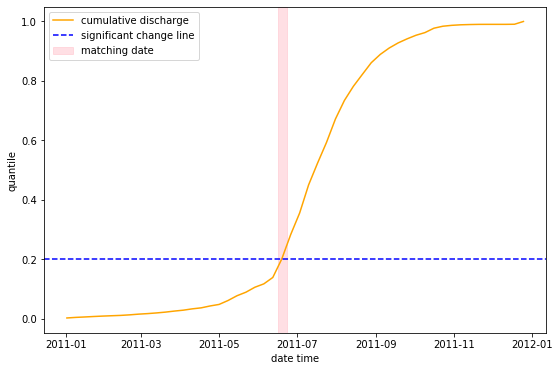

In [38]:
df_2011=df_week1[104:156]

dsum2011=np.sum(df_2011['discharge'])
dcsum2011=np.cumsum(df_2011['discharge'])
dcp2011=dcsum2011/dsum2011

tsum2011=np.sum(df_2011['tmean'])
tcsum2011=np.cumsum(df_2011['tmean'])
tcp2011=tcsum2011/tsum2011



plt.figure(figsize=(9,6))
plt.plot(df_2011['datetime'], dcp2011, label='cumulative discharge', color='orange')

plt.axhline(0.2, color='blue', linestyle='--', label='significant change line')
plt.axvspan('2011-06-16','2011-06-23', alpha=0.5, color='pink', label='matching date')

plt.xlabel('date time')
plt.ylabel('quantile')
plt.legend(loc="best")

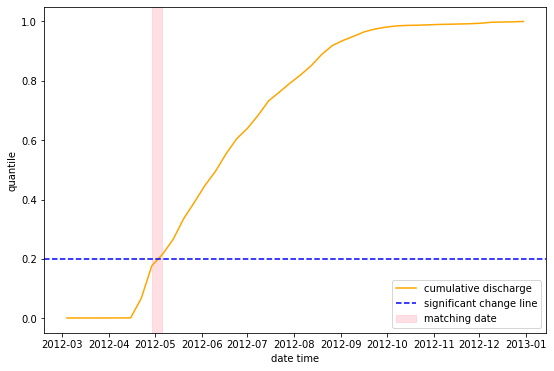

In [39]:
df_2012=df_week1[156:209]
df_2012=df_2012[df_2012['datetime']>='2012-03-01']
dsum2012=np.sum(df_2012['discharge'])
dcsum2012=np.cumsum(df_2012['discharge'])
dcp2012=dcsum2012/dsum2012

tsum2012=np.sum(df_2012['tmean'])
tcsum2012=np.cumsum(df_2012['tmean'])
tcp2012=tcsum2012/tsum2012


plt.figure(figsize=(9,6))
plt.plot(df_2012['datetime'], dcp2012, label='cumulative discharge', color='orange')
plt.axhline(0.2, color='blue', linestyle='--', label='significant change line')
plt.axvspan('2012-04-29','2012-05-06', alpha=0.5, color='pink', label='matching date')
plt.xlabel('date time')
plt.ylabel('quantile')
plt.legend(loc="best")

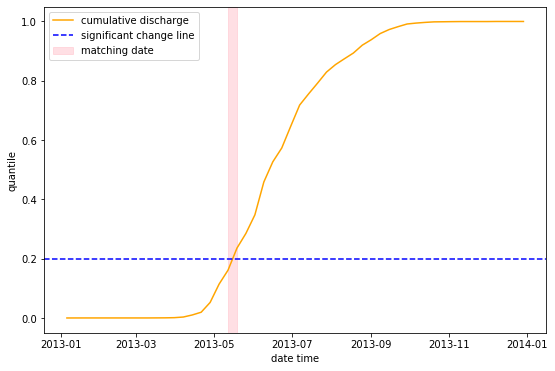

In [40]:
df_2013=df_week1[209:261]
dsum2013=np.sum(df_2013['discharge'])
dcsum2013=np.cumsum(df_2013['discharge'])
dcp2013=dcsum2013/dsum2013

tsum2013=np.sum(df_2013['tmean'])
tcsum2013=np.cumsum(df_2013['tmean'])
tcp2013=tcsum2013/tsum2013

plt.figure(figsize=(9,6))
plt.plot(df_2013['datetime'], dcp2013, label='cumulative discharge', color='orange')
plt.axhline(0.2, color='blue', linestyle='--', label='significant change line')
plt.axvspan('2013-05-12','2013-05-19', alpha=0.5, color='pink', label='matching date')
plt.xlabel('date time')
plt.ylabel('quantile')
plt.legend(loc="best")

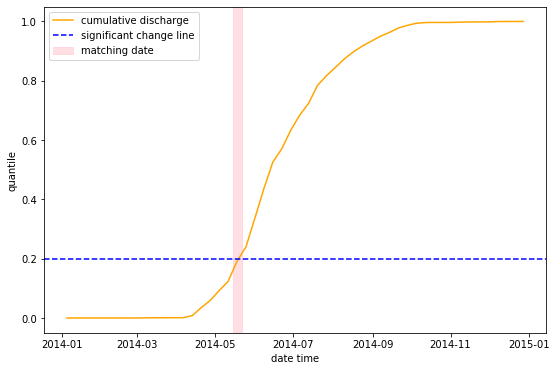

In [41]:
df_2014=df_week1[261:313]
dsum2014=np.sum(df_2014['discharge'])
dcsum2014=np.cumsum(df_2014['discharge'])
dcp2014=dcsum2014/dsum2014

tsum2014=np.sum(df_2014['tmean'])
tcsum2014=np.cumsum(df_2014['tmean'])
tcp2014=tcsum2014/tsum2014

plt.figure(figsize=(9,6))
plt.plot(df_2014['datetime'], dcp2014, label='cumulative discharge', color='orange')

plt.axhline(0.2, color='blue', linestyle='--', label='significant change line')
plt.axvspan('2014-05-15','2014-05-22', alpha=0.5, color='pink', label='matching date')

plt.xlabel('date time')
plt.ylabel('quantile')
plt.legend(loc="best")

Discharge initiation date:

2009:5/24/2009

2010:6/13/2010

2011:6/20/2011

2012:5/2/2012

2013:5/15/2013

2014:5/20/2014

Here we can propose that the temperature after 2012 is slightly higher than before 2012. Then we use ANOVA test to see if there is any difference in the tmin and discharge in different periods.

In [42]:
df_at=pd.read_csv('Dana_Meadows_model_forcing_dataset.csv')

In [43]:
df_at.head()

,date_time_UTC,date_time_PST,T_deg_C,Wind_m_per_s,RH_percent,SWdwnGapFill,LWdwnMTCLIM,precip_m
0,2002/10/01 07:00:00,2002/09/30 23:00:00,-5.56,0.447,91,0.0,220.74,0.0
1,2002/10/01 08:00:00,2002/10/01 00:00:00,-5.56,0.447,81,0.0,220.74,0.0
2,2002/10/01 09:00:00,2002/10/01 01:00:00,-5.56,0.447,52,0.0,220.74,0.0
3,2002/10/01 10:00:00,2002/10/01 02:00:00,-6.11,0.447,44,0.0,218.94,0.0
4,2002/10/01 11:00:00,2002/10/01 03:00:00,-6.67,0.447,41,0.0,217.14,0.0


In [44]:
df_at[' date_time_PST']=pd.to_datetime(df_at[' date_time_PST'])

Text(0.5, 1.0, 'Air temperature time series plot')

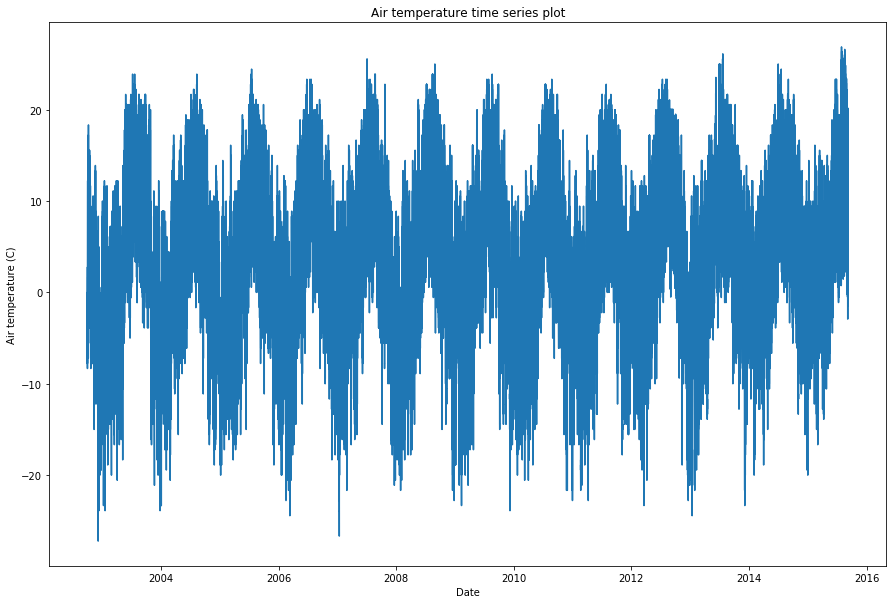

In [45]:
plt.figure(figsize=(15,10))
plt.plot(df_at[' date_time_PST'],df_at[' T_deg_C'])
plt.xlabel('Date')
plt.ylabel('Air temperature (C)')
plt.title('Air temperature time series plot')

In [46]:
df_at.columns

Index(['date_time_UTC', ' date_time_PST', ' T_deg_C', ' Wind_m_per_s',
       ' RH_percent', ' SWdwnGapFill', ' LWdwnMTCLIM', ' precip_m'],
      dtype='object')

In [47]:
df_at=df_at.set_index(' date_time_PST')
df_at=df_at[df_at.index>='2009-01-01 00:00:00']
temp=df_at[ ' T_deg_C'].resample('W').mean()
wind=df_at[' Wind_m_per_s'].resample('W').mean()
rh=df_at[ ' RH_percent'].resample('W').mean()
swgf=df_at[' SWdwnGapFill'].resample('W').mean()
lwmt=df_at[' LWdwnMTCLIM'].resample('W').min()
precip=df_at[' precip_m'].resample('W').max()

In [48]:
df_am=pd.DataFrame()
df_am['temp']=temp
df_am['wind']=wind
df_am['rh']=rh
df_am['swgf']=swgf
df_am['lwmt']=lwmt
df_am['precip']=precip

In [49]:
df_am.head()

,temp,wind,rh,swgf,lwmt,precip
date_time_PST,,,,,,
2009-01-04,-8.142500,1.266500,63.385417,110.601146,174.92,0.000358
2009-01-11,-1.431964,1.452750,42.803571,136.957679,205.21,0.000358
2009-01-18,-0.109286,1.545875,24.488095,112.025298,215.62,0.000000
2009-01-25,-2.638810,1.128143,68.892857,87.234821,194.07,0.001600
2009-02-01,-6.210060,1.306411,55.458333,138.133036,168.21,0.000000


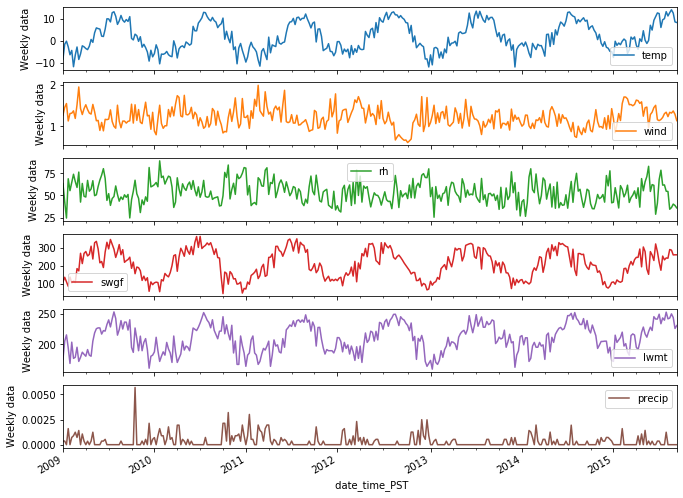

In [50]:
cols_plot = df_am.columns
axes = df_am[cols_plot].plot( linestyle='-', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Weekly data')

In [51]:
df_ap=df_am[df_am.index<='2012-07-29 00:00:00']
df_aa=df_am[df_am.index>'2012-07-29 00:00:00']
print('before 2012 temp mean=',df_ap['temp'].mean())
print('before 2012 precip mean=',df_ap['precip'].mean())
print('after 2012 temp mean=',df_aa['temp'].mean())
print('after 2012 precip mean=',df_aa['precip'].mean())

before 2012 temp mean= 1.136373503947033
before 2012 precip mean= 0.0004486836363636363
after 2012 temp mean= 2.9619712240724523
after 2012 precip mean= 0.0002551641717791409


# TEMP

In [52]:
n = len(df_ap['temp'])
m = len(df_aa['temp'])
print(n)
print(m)

187
163


In [53]:
conf = 0.95
delta_0 = 0
z_alpha = st.norm.ppf(conf)
print("z_alpha =")
print(z_alpha)
mean1 = stats.mean(df_ap['temp'])
mean2 = stats.mean(df_aa['temp'])
sd1 = stats.stdev(df_ap['temp'])
sd2 = stats.stdev(df_aa['temp'])
pooled_sd = math.sqrt(sd1**2/m + sd2**2/n)
ztest = (mean2 - mean1 - delta_0)/pooled_sd
print("z_test =")
print(ztest)
p = 1-st.norm.cdf(ztest)
print("p = ")
print(p)

z_alpha =
1.6448536269514722
z_test =
2.6570105349663824
p = 
0.0039418489675172586


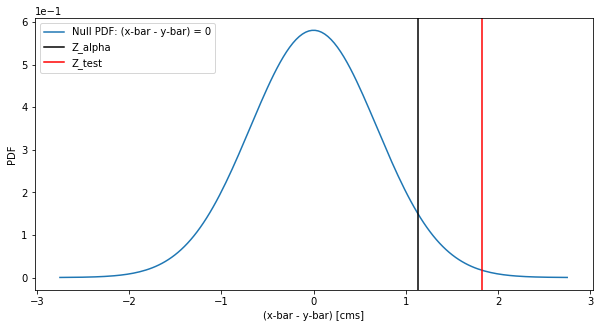

In [54]:
plt.figure(figsize=(10,5))
x = np.linspace(-4, 4, num=160)
x = [i * pooled_sd for i in x]
plt.plot(x, st.norm.pdf(x, 0, pooled_sd), label='Null PDF: (x-bar - y-bar) = 0')
plt.axvline(z_alpha*pooled_sd, color='black', label='Z_alpha')
plt.axvline(ztest*pooled_sd, color='red', label='Z_test')
plt.xlabel('(x-bar - y-bar) [cms]')
plt.ylabel('PDF')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.legend(loc='best')

# In 95% confidence, temperature after 2012 is higher than before 2012 at mean value.

In [55]:
conf = 0.95
delta_0 = 0
z_alpha = st.norm.ppf(conf)
print("z_alpha =")
print(z_alpha)
mean2 = stats.mean(df_ap['precip'])
mean1 = stats.mean(df_aa['precip'])
sd2 = stats.stdev(df_ap['precip'])
sd1 = stats.stdev(df_aa['precip'])
pooled_sd = math.sqrt(sd1**2/m + sd2**2/n)
ztest = (mean2 - mean1 - delta_0)/pooled_sd
print("z_test =")
print(ztest)
p = 1-st.norm.cdf(ztest)
print("p = ")
print(p)

z_alpha =
1.6448536269514722
z_test =
2.8984393063936804
p = 
0.0018751244311449033


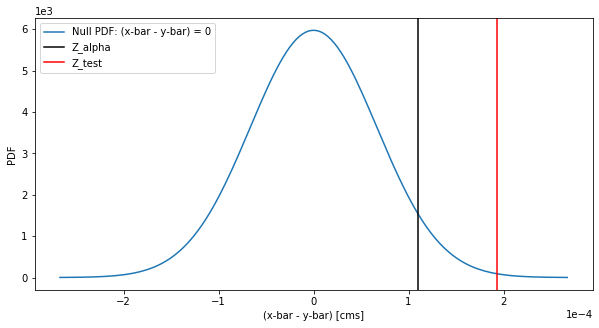

In [56]:
plt.figure(figsize=(10,5))
x = np.linspace(-4, 4, num=160)
x = [i * pooled_sd for i in x]
plt.plot(x, st.norm.pdf(x, 0, pooled_sd), label='Null PDF: (x-bar - y-bar) = 0')
plt.axvline(z_alpha*pooled_sd, color='black', label='Z_alpha')
plt.axvline(ztest*pooled_sd, color='red', label='Z_test')
plt.xlabel('(x-bar - y-bar) [cms]')
plt.ylabel('PDF')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.legend(loc='best')

# In 95% confidence, precip after 2012 is lower than before 2012 at mean value.

# Date check

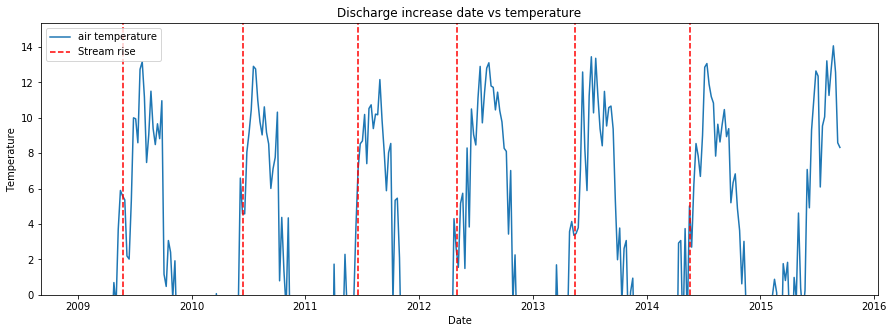

In [69]:
plt.figure(figsize=(15,5))
plt.plot(df_am['temp'],label='air temperature')
#plt.plot(df_month['tmean'],color='k',linestyle='--',label='water temperature')
plt.axvline('05-24-2009',color='r',linestyle='--',label='Stream rise')
plt.axvline('06-13-2010',color='r',linestyle='--')
plt.axvline('06-20-2011',color='r',linestyle='--')
plt.axvline('05-02-2012',color='r',linestyle='--')
plt.axvline('05-15-2013',color='r',linestyle='--')
plt.axvline('05-20-2014',color='r',linestyle='--')
plt.legend(loc='best')
plt.ylim(0,);
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Discharge increase date vs temperature');
#plt.xlim('2009-01-01','2010-01-01')

In [58]:
df_amm=df_am.iloc[:-11,:]

In [59]:
df_month.tail()

,discharge,offset,pressure,tmean,tmin,tmax
date_time(inGMT_PDTplus7),,,,,,
2015-05-31,1.306850,-489.2,719.575506,3.522143,0.38,8.31
2015-06-07,1.126418,-489.2,716.747113,4.300744,0.49,9.22
2015-06-14,1.578808,-489.2,723.040417,5.786190,3.08,10.99
2015-06-21,1.114875,-489.2,717.257351,8.225417,3.50,13.22
2015-06-28,0.801505,-489.2,712.189254,9.185597,4.94,14.02


# EZ model

In [60]:
Xmulti = np.array([df_amm['precip'],
                   df_amm['temp'],
                   ]).T
print(Xmulti.shape)
print(df_month['tmean'].shape)

(339, 2)
(339,)


In [61]:
B, res, rnk, s = lstsq(Xmulti, df_month['tmean'])
print('The trend for each variable=', B)

The trend for each variable= [1.85768442e+03 6.28052063e-01]


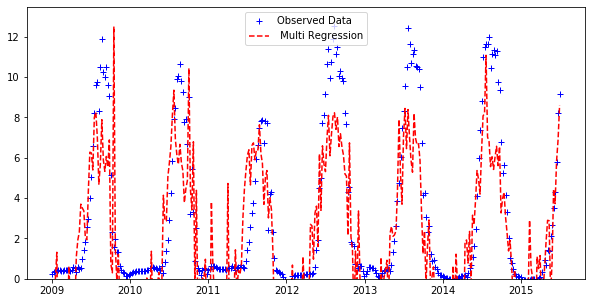

In [62]:
plt.figure(figsize=(10,5))
plt.plot(df_month['tmean'],'b+', label='Observed Data')
plt.plot(df_month.index,Xmulti.dot(B),'r--', label=' Multi Regression')
plt.ylim(0,)
#n = df_month['discharge'].size
#Bv2 = np.polyfit(df_month['discharge'],df_month['discharge'],1)
#print('The trend for precipitation= ', Bv2)
#x = np.linspace(np.min(df_cas['year']), np.max(df_cas['year']),n)
#y = Bv2[1] + Bv2[0]*x
#plt.plot(x,y,'k--',label='Linear Regression');

plt.legend()

In [63]:
B, res, rnk, s = lstsq(Xmulti, df_month['tmean'])
print('The trend for each variable=', B)

The trend for each variable= [1.85768442e+03 6.28052063e-01]


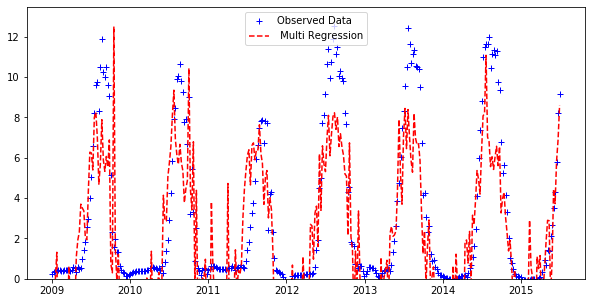

In [64]:
plt.figure(figsize=(10,5))
plt.plot(df_month['tmean'],'b+', label='Observed Data')
plt.plot(df_month.index,Xmulti.dot(B),'r--', label=' Multi Regression')

#n = df_month['discharge'].size
#Bv2 = np.polyfit(df_month['discharge'],df_month['discharge'],1)
#print('The trend for precipitation= ', Bv2)
#x = np.linspace(np.min(df_cas['year']), np.max(df_cas['year']),n)
#y = Bv2[1] + Bv2[0]*x
#plt.plot(x,y,'k--',label='Linear Regression');
plt.ylim(0,)
plt.legend()

In [65]:
a=df_month['2010']

In [66]:
df_month['tmean'].groupby(lambda x : x.month)

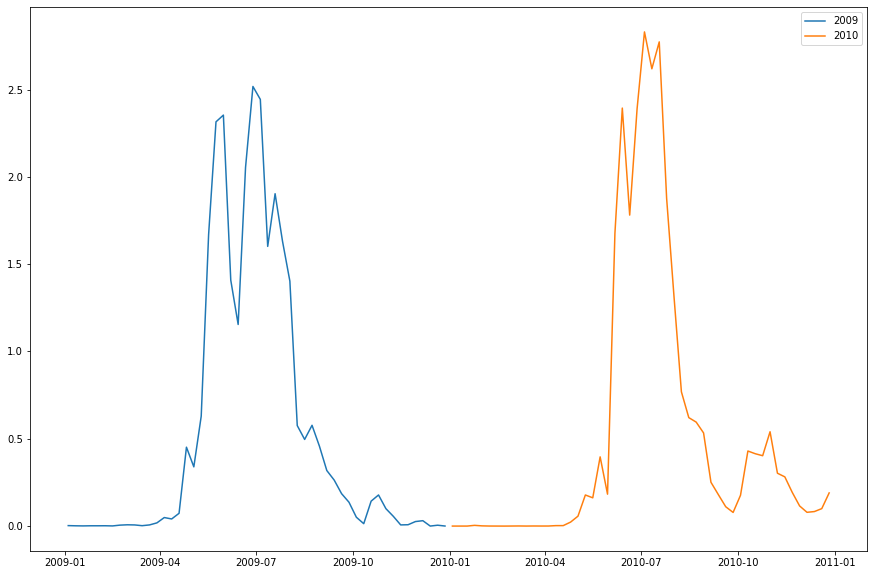

In [67]:
plt.figure(figsize=(15,10))
#x=np.linspace(df_month["2009"]['discharge'],7)
plt.plot(df_month["2009"]['discharge'],label='2009')
plt.plot(df_month["2010"]['discharge'],label='2010')
#plt.plot(df_month["2011"]['discharge'],label='2011')
#plt.plot(df_month["2012"]['discharge'],label='2012')
#plt.plot(df_month["2013"]['discharge'],label='2013')
#plt.plot(df_month["2014"]['discharge'],label='2014')
#plt.plot(df_month["2015"]['discharge'],label='2015')
plt.legend()

# Use the preliminary model above to introduce the advanced model later